<a href="https://colab.research.google.com/github/HummerQAQ/DM2024-Lab2-Master/blob/main/DM2024_Lab2_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


100%|██████████| 400k/400k [00:00<00:00, 54.9MB/s]

Extracting files...


100%|██████████| 3.29M/3.29M [00:00<00:00, 177MB/s]

Extracting files...


100%|██████████| 1.64G/1.64G [00:20<00:00, 84.8MB/s]

Extracting files...


Data source import complete.


In [3]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 106.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 106.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip

In [4]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [5]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

Error: could not connect to ollama app, is it running?


In [6]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest ⠦ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏  37 KB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏ 5.6 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   2% ▕▏  42 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   5% ▕▏  92 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   5% ▕▏ 102 MB/2.0 GB                  pulling manifest 
pulling dde

In [7]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏ 1.0 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   1% ▕▏  25 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   2% ▕▏  45 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   4% ▕▏  81 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   5% ▕▏ 116 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   5% ▕▏ 126 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...  

In [8]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=true)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [9]:
import pandas as pd

### training data
anger_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [10]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [11]:
### testing data
anger_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [12]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [13]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---

> 加入區塊引述符號


### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


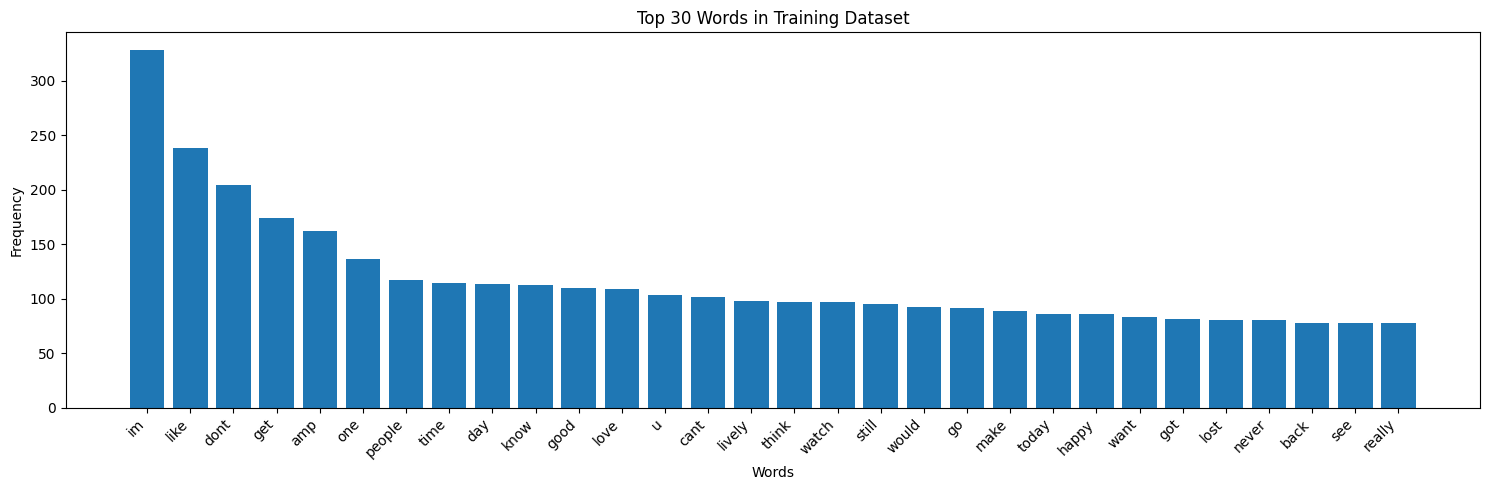

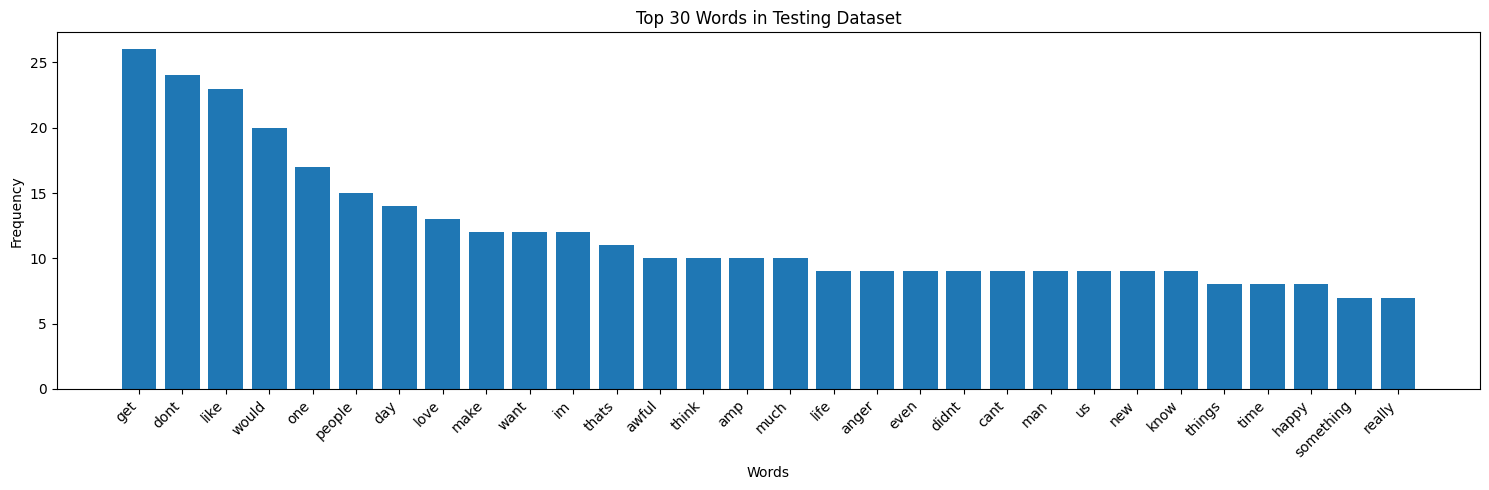

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import string

# 下載所需的 NLTK 資源
nltk.download('stopwords')

def preprocess_text(text):
    # 轉小寫
    text = text.lower()
    # 移除標點符號
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 分詞 (使用 split 而不是 word_tokenize)
    words = text.split()
    # 移除停用詞
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

def plot_word_frequencies(df, title):
    # 合併所有文本
    all_words = []
    for text in df['text']:
        all_words.extend(preprocess_text(text))

    # 計算詞頻
    word_freq = Counter(all_words).most_common(30)
    words, frequencies = zip(*word_freq)

    # 繪製圖表
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(words)), frequencies)
    plt.xticks(range(len(words)), words, rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 繪製訓練集的詞頻圖
plot_word_frequencies(train_df, 'Top 30 Words in Training Dataset')

# 繪製測試集的詞頻圖
plot_word_frequencies(test_df, 'Top 30 Words in Testing Dataset')

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [16]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [17]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [18]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


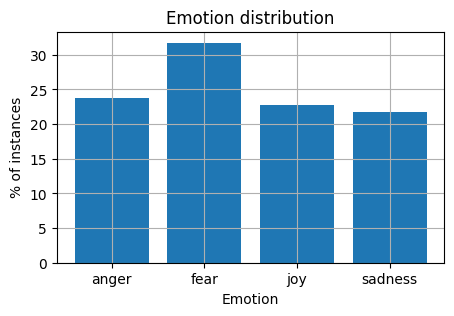

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [22]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [23]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [24]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [25]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [27]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [28]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [29]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [30]:
train_data_BOW_features_500.toarray()

array([[0, 7, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [32]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [33]:
# Answer here
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt_tab')

# Create TF-IDF vectorizer with 1000 features
TFIDF_1000 = TfidfVectorizer(
    max_features=1000,  # 限制特徵數量為1000
    tokenizer=nltk.word_tokenize  # 使用 NLTK 的分詞器
)

# Apply vectorizer to training data
# 1. Fit the vectorizer to learn vocabulary
# 2. Transform the text to TF-IDF features
train_data_TFIDF_features_1000 = TFIDF_1000.fit_transform(train_df['text'])

# Check dimension
print("Shape of TF-IDF features:", train_data_TFIDF_features_1000.shape)

# Show some feature names (similar to the example)
feature_names_1000 = TFIDF_1000.get_feature_names_out()
print("\nSample feature names (index 100-110):")
print(feature_names_1000[100:110])

# Convert to array to see some values (similar to the example)
print("\nSample of the TF-IDF matrix:")
print(train_data_TFIDF_features_1000.toarray()[:5, :10])  # 顯示前5行和前10列

# Check if emoticon is in features
print("\nIs '😄' in features?:", '😄' in feature_names_1000)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Shape of TF-IDF features: (3613, 1000)

Sample feature names (index 100-110):
['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']

Sample of the TF-IDF matrix:
[[0.         0.76274126 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.47674121 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.20314608 0.12574628 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.21933956 0.13576995 0.         0.         0.         0.
  0.         0.         0.         0.34209509]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]

Is '😄' in features?: False


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [35]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'joy', 'joy', 'fear', 'sadness', 'fear',
       'anger', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [36]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [37]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [38]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [39]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

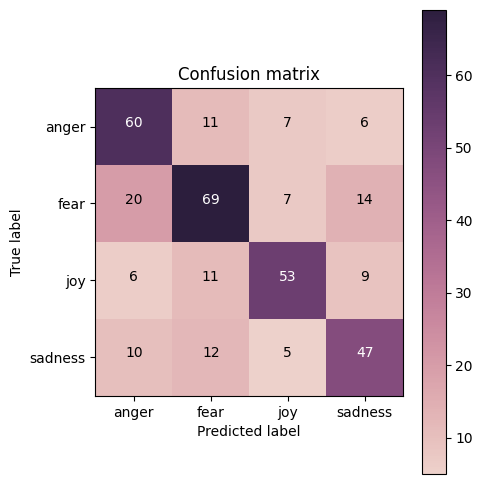

In [40]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [41]:
# Answer here


## 模型表現

- **訓練準確率**：99%（0.99）
- **測試準確率**：66%（0.66）

模型可能過擬合問題，因為訓練集表現遠高於測試集。

---

## 各類別的表現

| 情緒類別 | 精確率 |
|----------|--------|
| Joy | **0.74** |
| Fear | 0.67 |
| Anger  | 0.62 |
| Sadness | 0.62 |

Joy 表現最好，其次是 Fear，Anger 和 Sadness 的精確率表現相同。

---

## 矩陣分析

### 對角線數值即正確預測數量
- **Anger**：60 次正確
- **Fear**：69 次正確
- **Joy**：53 次正確
- **Sadness**：47 次正確

### 錯誤
- **Fear 常被誤判為 Anger**：20 次
- **Fear 常被誤判為 Sadness**：14 次
- **Anger 和 Fear 之間有較多混淆**


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training accuracy: 0.86
Testing accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.71      0.77        84
        fear       0.65      0.92      0.76       110
         joy       0.85      0.72      0.78        79
     sadness       0.85      0.59      0.70        74

    accuracy                           0.76       347
   macro avg       0.79      0.74      0.75       347
weighted avg       0.78      0.76      0.75       347



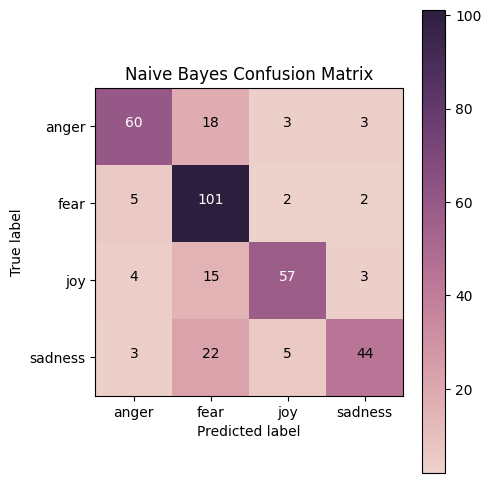

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TF-IDF
# 使用 transform，確保使用的特徵和訓練資料一樣
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(train_data_TFIDF_features_1000, train_df['emotion'])

# 預測
nb_train_pred = nb_model.predict(train_data_TFIDF_features_1000)
nb_test_pred = nb_model.predict(test_data_TFIDF_features_1000)

# 計算準確率
print("Training accuracy: {:.2f}".format(accuracy_score(train_df['emotion'], nb_train_pred)))
print("Testing accuracy: {:.2f}".format(accuracy_score(test_df['emotion'], nb_test_pred)))

# 打印分類結果
print("\nClassification Report:")
print(classification_report(test_df['emotion'], nb_test_pred))

# 繪製矩陣
cm_nb = confusion_matrix(test_df['emotion'], nb_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [43]:
# Answer here

## 模型比較

### 準確率比較

| 模型          | 訓練集準確率 | 測試集準確率 |
|---------------|------------|------------|
| Decision Tree | 0.99 (99%) | 0.66 (66%) |
| Naive Bayes   | 0.86 (86%) | 0.76 (76%) |

- **模型穩定性分析**：
  - Decision Tree 明顯的過擬合：訓練和測試集差距達 33%。
  - Naive Bayes 較穩定，無明顯過擬和，差距僅 10%。
  - Naive Bayes 的測試集表現更好（76% > 66%）。

### 各類別表現比較

| 模型          | 精確率範圍  | 召回率範圍  |
|---------------|-------------|-------------|
| Decision Tree | 0.62 - 0.74 | 0.63 - 0.71 |
| Naive Bayes   | 0.65 - 0.85 | 0.59 - 0.92 |

- 特別是 Naive Bayes 在 Fear 類別的召回率達到 **0.92**。

### 混淆矩陣比較

- **Decision Tree 的關鍵問題**：
  - Fear 經常被誤判為 Anger（20 次）和 Sadness（14 次）。

- **Naive Bayes如何改進**：
  - Fear 的分類準確度大幅提升（101 次正確）。
  - Sadness 被誤判為 Fear 的情況仍然存在（22 次）。

---

## 解釋

### Naive Bayes 表現更好的原因

1. **文本分類特性**：
   - Naive Bayes 假設特徵獨立，適合處理高維度但結構簡單的文本數據。

2. **機率模型**：
   - Naive Bayes 能更好處理文本中的字詞分佈的不確定性。

3. **較少過擬合**：
   - 基於簡單的統計機率計算，不容易過度擬合數據。

4. **計算速度快**
   - Naive Bayes 模型原理簡單直觀，運行速度和解釋力較高於其他機器學習模型

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [44]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [45]:
import keras

In [46]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [47]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 824       anger
2963    sadness
2131        joy
1098       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [48]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [49]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [50]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)


113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 507ms/step - accuracy: 0.3195 - loss: 1.3642 - val_accuracy: 0.4323 - val_loss: 1.2846
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.5993 - loss: 1.1102 - val_accuracy: 0.6657 - val_loss: 0.9153
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.8046 - loss: 0.6118 - val_accuracy: 0.6801 - val_loss: 0.7774
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8465 - loss: 0.4233 - val_accuracy: 0.7320 - val_loss: 0.7471
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8908 - loss: 0.3203 - val_accuracy: 0.7176 - val_loss: 0.7698
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9201 - loss: 0.2551 - val_accuracy: 0.7089 - val_loss: 0.7998
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9276 - loss: 0.2146 - val_accuracy: 0.7205 - val_loss: 0.8834
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9416 - loss: 0.1854 - val_accuracy

### 6.5 Predict on testing data

In [51]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step


array([[5.4678470e-03, 5.1147305e-07, 1.1368985e-02, 9.8316276e-01],
       [9.9999774e-01, 6.3724434e-07, 6.4118200e-10, 1.6732679e-06],
       [4.1485061e-03, 1.8386863e-05, 9.9532962e-01, 5.0354860e-04],
       [7.3638269e-08, 1.2321737e-08, 9.9999988e-01, 5.1289755e-09],
       [2.8741123e-02, 2.3437500e-02, 9.4648278e-01, 1.3386183e-03]],
      dtype=float32)

In [52]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'joy', 'joy', 'joy'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.359535,1.334302,0.432277,1.284649
1,1,0.644617,1.005163,0.665706,0.915306
2,2,0.794354,0.587082,0.680115,0.777426
3,3,0.841683,0.421784,0.731988,0.747131
4,4,0.885414,0.325418,0.717579,0.769841
5,5,0.913368,0.264478,0.708934,0.799796
6,6,0.925823,0.221736,0.720461,0.883402
7,7,0.941046,0.184444,0.714697,0.933195
8,8,0.947689,0.160590,0.694524,0.984828
9,9,0.960144,0.136003,0.711816,1.025574


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!

<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

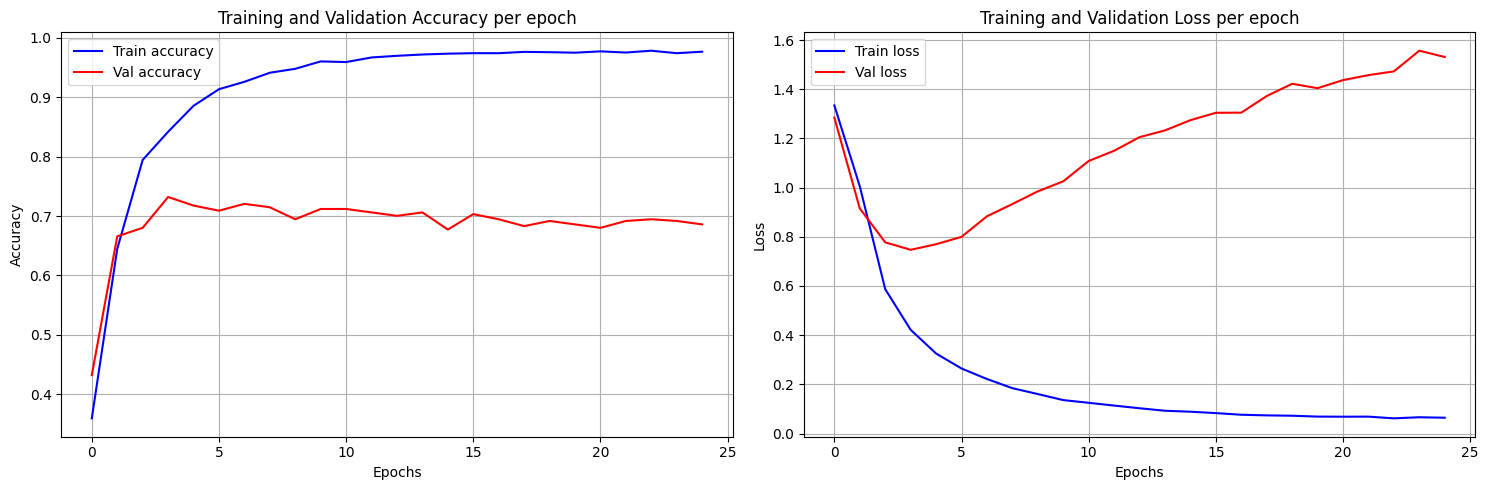

In [55]:
# Answer here
import matplotlib.pyplot as plt

# 提取訓練數據
epochs = training_log['epoch'].values
train_acc = training_log['accuracy'].values
val_acc = training_log['val_accuracy'].values
train_loss = training_log['loss'].values
val_loss = training_log['val_loss'].values

# 創建圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 繪製準確率圖
ax1.plot(epochs, train_acc, 'b-', label='Train accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Val accuracy')
ax1.set_title('Training and Validation Accuracy per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 繪製損失圖
ax2.plot(epochs, train_loss, 'b-', label='Train loss')
ax2.plot(epochs, val_loss, 'r-', label='Val loss')
ax2.set_title('Training and Validation Loss per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 準確率圖分析（左圖）

#### 訓練準確率（藍）：

- 從約 40% 快速上升到 90%以上。
- 在第 5 個 epoch 後趨於平穩，最終達到 95%左右。

#### 驗證準確率（紅）：

- 初期與訓練準確率一起快速上升。
- 在約 70% 處達到高峰。
- 之後略有波動但基本上維持在 65-70% 之間。

### 損失函數圖分析（右圖）

#### 訓練損失（藍）：

- 從 1.3 快速下降。
- 持續下降至接近 0。

#### 驗證損失（紅）：

- 初期與訓練損失一起下降。
- 在第 5 個 epoch 後開始上升。
- 持續增加到約 1.6。

### 過擬合分析

- **明顯的過擬合**：
  - 訓練準確率持續上升，但驗證準確率停滯。
  - 訓練損失接近 0，但驗證損失持續增加。
  - 訓練和驗證指標的差距隨時間擴大。

---

## 如何處理過擬合

1. **運用訓練技術**：
   - 添加 Dropout 層。
   - 使用 L1/L2 正則化。

2. **減少模型複雜度**：
   - 減少隱藏層數量。
   - 減少神經元數量。

3. **早停**：
   - 在第 5-10 個 epoch 時停止訓練。


---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [56]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
824,10824,630am meeting Olympic House #10golds24 . #rel...,"[630am, meeting, Olympic, House, #, 10golds24,..."
2963,40136,From My head to think it was better but obviou...,"[From, My, head, to, think, it, was, better, b..."
2131,30127,Thanks for making our Mass with Fr. Vallely re...,"[Thanks, for, making, our, Mass, with, Fr, ., ..."
1098,20241,@BartholomewD It's -terrible-! We're going to ...,"[@, BartholomewD, It, 's, -terrible-, !, We, '..."
1922,21065,@Burnt_Out_Darth @theaterofscifi thanks.,"[@, Burnt_Out_Darth, @, theaterofscifi, thanks..."


In [57]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['630am', 'meeting', 'Olympic', 'House', '#', '10golds24', '.', '#', 'relentless', '#', 'neverquit', '#', 'believe', '#', 'dreambig', '#', 'TeamTTO', '#', 'going4gold']),
       list(['From', 'My', 'head', 'to', 'think', 'it', 'was', 'better', 'but', 'obviously', 'it', "'s", 'not', '#', 'relapse', '#', 'sadness', '#', 'sickness', '#', 'madness', '#', 'misunderstanding']),
       list(['Thanks', 'for', 'making', 'our', 'Mass', 'with', 'Fr', '.', 'Vallely', 'respectful', ',', 'meaningful', ',', 'and', 'joyful', '@', 'ACSSCrusader', '@', 'AssumptionHCDSB', '!', '#', 'SeeWithEyesOfMercy'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [58]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [59]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 5.07381201e-01,  1.21794343e-01, -4.88866605e-02,  1.90680712e-01,
       -3.69319677e-01, -9.60738719e-01,  7.50542462e-01,  1.14530802e+00,
       -5.67441821e-01, -2.99265355e-01, -5.13397932e-01, -5.04700184e-01,
       -8.69497240e-01,  1.51101511e-03, -7.89409727e-02, -3.87406796e-01,
        8.02081078e-02, -4.25965786e-01, -2.67117709e-01, -1.00298119e+00,
        4.96213526e-01,  6.63198888e-01,  5.14033914e-01, -8.24739709e-02,
        2.15244964e-01,  2.48016611e-01, -8.90924394e-01,  3.84684414e-01,
       -5.34943342e-01,  5.85665554e-03,  1.09238885e-01, -1.88685939e-01,
        7.19112813e-01, -6.79906249e-01,  2.37995520e-01,  6.33533835e-01,
        5.39053202e-01, -4.49341804e-01, -6.05800748e-01, -5.84133267e-01,
       -2.11042777e-01, -5.43539636e-02, -3.49710226e-01,  5.33037603e-01,
        6.98595703e-01, -3.31685692e-02, -6.58934712e-01,  2.19766900e-01,
        9.58082438e-01,  5.52595854e-01, -1.54493168e-01, -6.58017576e-01,
        3.56000125e-01,  

In [60]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9408434629440308),
 ('Be', 0.924172043800354),
 ('help', 0.9221698641777039),
 ('tones', 0.9169055819511414),
 ('free', 0.9043395519256592),
 ('kinda', 0.9037193059921265),
 ('hope', 0.9030794501304626),
 ('birthday', 0.8981938362121582),
 ('dad', 0.8968557119369507),
 ('Makes', 0.8960062265396118)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [61]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = f"{didiersalazar_google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [62]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [63]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [64]:
# Answer here

In [65]:
#1. Mean/Average Word Embeddings

def sentence_to_vec(sentence, word2vec_model, vector_size=100):
    word_vectors = []
    for word in sentence:
        try:
            vector = word2vec_model.wv[word]
            word_vectors.append(vector)
        except KeyError:
            continue

    if word_vectors:
        # 計算所有詞向量的平均數
        sentence_vector = np.mean(word_vectors, axis=0)
        return sentence_vector
    else:
        return np.zeros(vector_size)

In [66]:
#2. TF-IDF Weighted Average
def sentence_to_weighted_vec(sentence, word2vec_model, tfidf_weights):
    vectors = []
    weights = []
    for word in sentence:
        try:
            vector = word2vec_model.wv[word]
            weight = tfidf_weights[word]
            vectors.append(vector)
            weights.append(weight)
        except KeyError:
            continue

    if vectors:
        weighted_vectors = [v * w for v, w in zip(vectors, weights)]
        return np.mean(weighted_vectors, axis=0)
    return np.zeros(vector_size)

In [67]:
#3. Sequential Representation
def create_sequence_vectors(sentences, word2vec_model, max_length):
    sequence_vectors = []
    for sentence in sentences:
        # 將句子轉換為固定長度的序列
        sequence = np.zeros((max_length, word2vec_model.vector_size))
        for i, word in enumerate(sentence[:max_length]):
            try:
                sequence[i] = word2vec_model.wv[word]
            except KeyError:
                continue
        sequence_vectors.append(sequence)
    return np.array(sequence_vectors)

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [68]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [69]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ae67e72b1c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 1
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [70]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [71]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [72]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

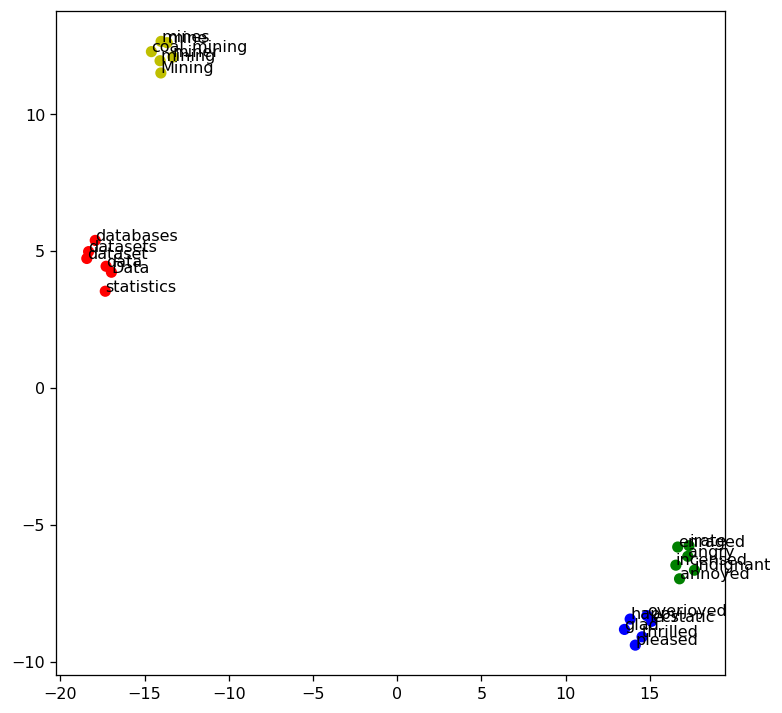

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

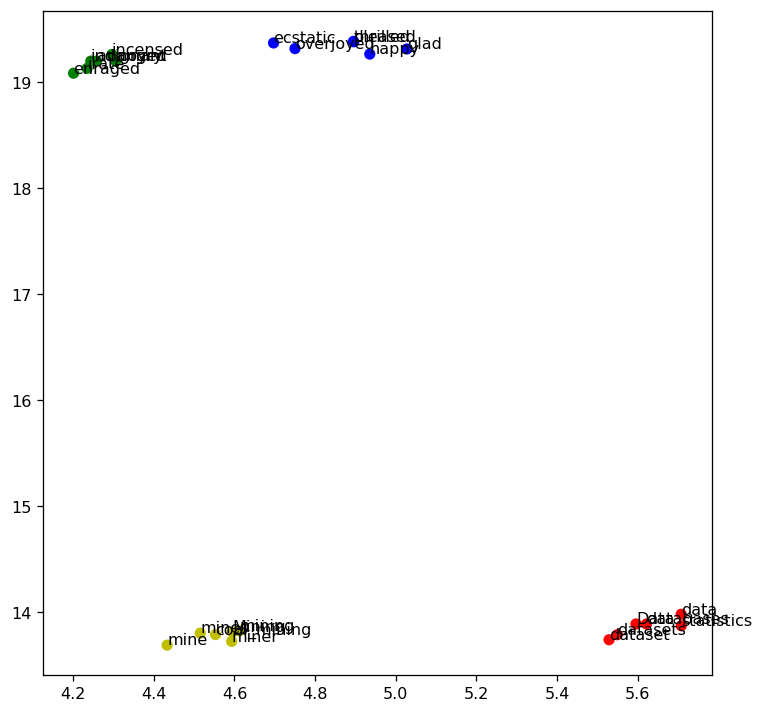

In [74]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

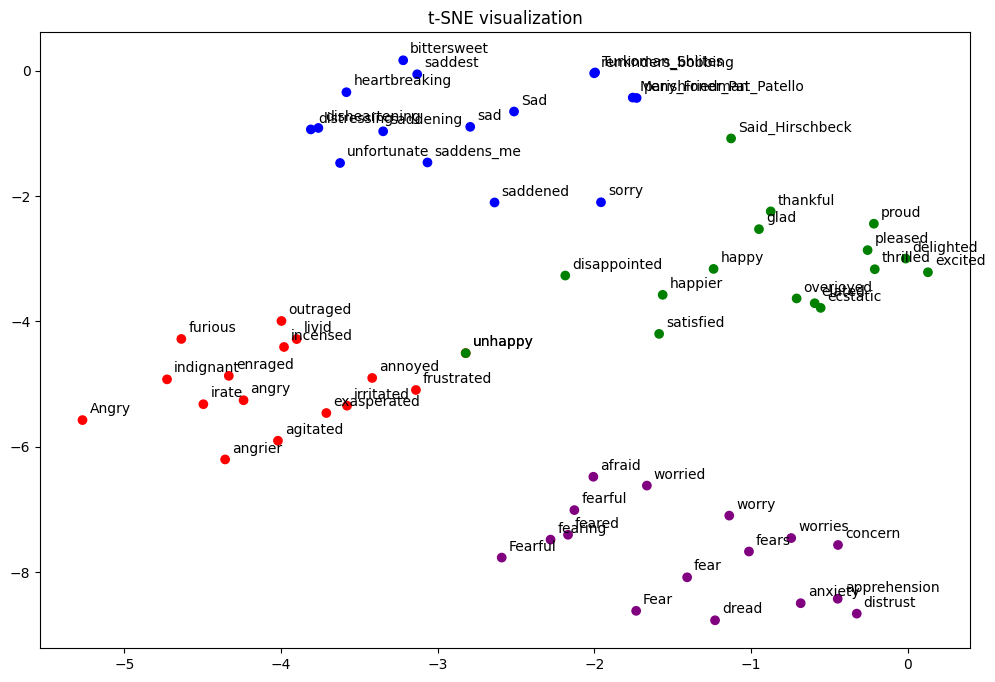

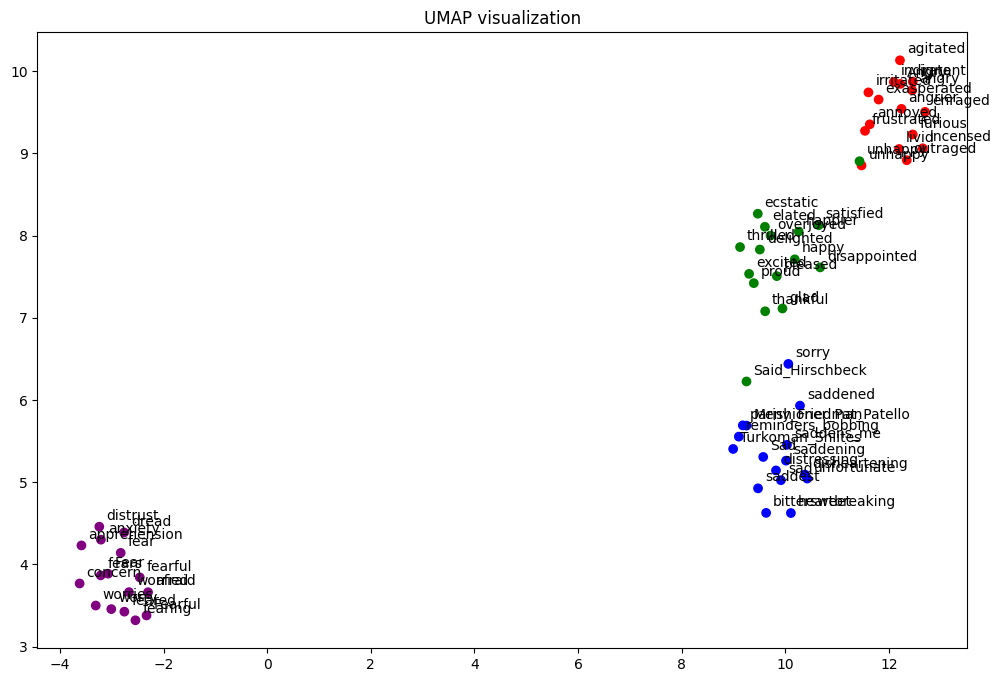

In [75]:
# Answer here
# 1. 詞列表
word_list = ['angry', 'happy', 'sad', 'fear']
topn = 15  # 各取15個最相關的詞

angry_words = ['angry'] + [word for word, sim in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word for word, sim in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word for word, sim in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word for word, sim in w2v_google_model.most_similar('fear', topn=topn)]

# 合併所有詞
target_words = angry_words + happy_words + sad_words + fear_words

colors = ['red'] * (topn + 1) + ['green'] * (topn + 1) + ['blue'] * (topn + 1) + ['purple'] * (topn + 1)

# t-SNE
def plot_tsne(target_words, colors, title="t-SNE visualization"):
    X = np.array([w2v_google_model[word] for word in target_words])

    # 降維
    tsne = TSNE(n_components=2, metric='cosine', random_state=28)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)

    for i, word in enumerate(target_words):
        plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]),
                    xytext=(5, 5), textcoords='offset points')

    plt.title(title)
    plt.show()

# UMAP
def plot_umap(target_words, colors, title="UMAP visualization"):
    X = np.array([w2v_google_model[word] for word in target_words])

    # 降維
    umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
    X_umap = umap_model.fit_transform(X)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)

    for i, word in enumerate(target_words):
        plt.annotate(word, xy=(X_umap[i, 0], X_umap[i, 1]),
                    xytext=(5, 5), textcoords='offset points')

    plt.title(title)
    plt.show()

# 繪製兩種視覺化
plot_tsne(target_words, colors)
plot_umap(target_words, colors)

### t-SNE

- **群集分布**：
  - 四種情緒的群集比較鬆散。
  - **生氣**和**恐懼**的詞彙分布在底部。
  - **快樂**的詞彙分布在右側中部。
  - **悲傷**的詞彙分布在上方中部。

- **詞之間的關係**：
  - 展示了更細緻的詞彙間關係。
  - 詞義相近的詞彙會更靠近（如 angry 和 furious）。

- **視覺化**：
  - 分布較為分散。
  - 顯現了更多局部細節。
  - 空間分佈較為平均。

---

### UMAP

- **群集分布**：
  - 群集更加緊密和明確。
  - **生氣**的詞彙集中在右上角。
  - **快樂**的詞彙在中間偏上。
  - **悲傷**的詞彙在中間偏下。
  - **恐懼**的詞彙集中在左下角。

- **詞之間的關係**：
  - 更強調群組間的整體關係。
  - 群集之間的邊界更清晰。
  - 相似情緒的詞彙聚集得更緊湊。

- **視覺化**：
  - 分布更加集中。
  - 群集間的區分更明顯。
  - 結構比較容易觀察和理解。

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)


In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [76]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract useful knowledge or information from raw data.

**Key Characteristics of Data Mining:**

* **Large datasets**: Data mining typically involves working with massive amounts of data, often in excess of millions of records.
* **Pattern discovery**: The goal is to identify patterns, relationships, and correlations within the data that can inform business decisions or drive innovation.
* **Automated processing**: Data mining often employs automated algorithms and statistical models to extract insights from the data, reducing the need for manual analysis.

**Types of Data Mining:**

1. **Supervised Learning**: Predictive modeling, where the goal is to make predictions about future events based on past data.
2. **Unsupervised Learning**: Exploratory analysis, where the goal is to identify

**We can use the IPython library to make the response look better:**

In [77]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [78]:
display(Markdown(response['message']['content']))

**Data Mining**
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract useful knowledge or information from raw data.

**Key Characteristics of Data Mining:**

* **Large datasets**: Data mining typically involves working with massive amounts of data, often in excess of millions of records.
* **Pattern discovery**: The goal is to identify patterns, relationships, and correlations within the data that can inform business decisions or drive innovation.
* **Automated processing**: Data mining often employs automated algorithms and statistical models to extract insights from the data, reducing the need for manual analysis.

**Types of Data Mining:**

1. **Supervised Learning**: Predictive modeling, where the goal is to make predictions about future events based on past data.
2. **Unsupervised Learning**: Exploratory analysis, where the goal is to identify patterns and structure in the data without prior knowledge of the target variable.
3. **Semi-Supervised Learning**: A combination of supervised and unsupervised learning, where some labeled data is available to improve model performance.

**Data Mining Applications:**

1. **Marketing Analysis**: Understanding customer behavior, predicting churn rates, and optimizing marketing campaigns.
2. **Customer Segmentation**: Identifying distinct groups within a customer base to tailor products or services.
3. **Predictive Maintenance**: Using historical data to predict equipment failures and schedule maintenance.
4. **Clinical Research**: Analyzing medical records to identify trends and potential treatments.

**Challenges in Data Mining:**

1. **Data Quality Issues**: Handling missing, noisy, or duplicate data can significantly impact results.
2. **High-Dimensional Data**: Managing large datasets with many features can be computationally expensive.
3. **Scalability**: Scaling data mining algorithms to handle massive datasets and complex computations.

**Tools and Techniques:**

1. **Data Warehousing**: Storing and managing large amounts of data in a centralized repository.
2. **Machine Learning Algorithms**: Supervised and unsupervised learning techniques, such as decision trees, clustering, and neural networks.
3. **Text Mining**: Analyzing unstructured text data to extract insights and patterns.

**Best Practices:**

1. **Data Preprocessing**: Cleaning, transforming, and preparing data for analysis.
2. **Model Evaluation**: Assessing the performance of models using metrics such as accuracy and precision.
3. **Interpretability**: Understanding model results and extracting actionable insights from data mining outputs.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [79]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are a helpful teaching assistant specialized in statistics.'
    },
    {
        'role': 'user',
        'content': 'What is a p-value?'
    },
    {
        'role': 'assistant',
        'content': 'A p-value is a statistical measure that helps determine the significance of your results.'
    },
    {
        'role': 'user',
        'content': 'Can you give me a practical example?'
    }
])

###System Role
特點：

- 設定整個對話的基礎規則
- 定義模型的身份和行為模式
- 通常在對話開始時設定
- 不會直接顯示給用戶

可以用來設定：
- 專業領域（如：數據科學家）
- 回答風格（如：正式、幽默）
- 輸出格式（如：markdown、JSON）
- 語言偏好（如：繁體中文、英文）

---

###Assistant Role
特點：

- 記錄 AI 先前的回應
- 確保對話的前後連貫性
- 可以引用之前的回答

用於：

- 多輪對話
- 推進問題

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=true)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=true)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [80]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

In the heart of a verdant field, a Shiba Inu dog is captured in mid-air, embodying the essence of joy and freedom. The dog, with its light brown coat speckled with white fur on its chest and legs, is stretched out horizontally, its body arched gracefully as it leaps through the air. Its tail, a fluffy ball of hair, points straight up towards the sky, adding to the sense of motion in the image.

The dog's eyes are locked onto the camera, and its tongue is playfully sticking out, perhaps after a bout of energetic play or an invigorating run through the grass. The field beneath it is a vibrant green, dotted here and there with small white patches that could be rocks or pieces of trash.

The background is blurred but gives the impression of trees standing tall against the sky. The focus on the dog and its dynamic pose suggests movement and energy, while also highlighting the contrast between it and the tranquil field setting. This image beautifully captures a moment of pure joy and freedom in nature.

In [81]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image showcases a **gray tabby cat** standing in the center of a white background. The cat's body and legs are adorned with distinctive black stripes, creating a classic tabby pattern. Its tail, also striped, hangs down behind it, adding to its poised stance. 

The head of the cat is turned to the left, giving us a clear view of its eyes which are a striking yellow color. The cat's gaze seems fixed on something off-camera, adding an air of curiosity and alertness to the image. 

Despite being inanimate, the white background provides a stark contrast that makes the gray tabby cat stand out prominently. There are no other objects or text present in the image, making the cat the sole focus of this composition. The relative position of the cat is central and it appears to be stationary with no implied motion. 

This detailed description provides an accurate representation of the image based on what can be confidently determined from it.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

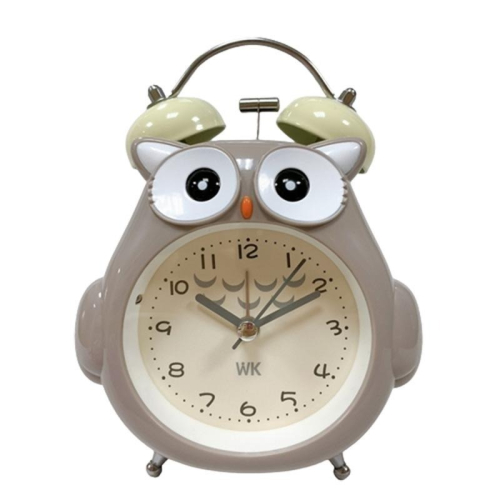

In [83]:
# Answer here
import ollama

response = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/content/P3333204663524_1_43140429.jpg']
    }
])

print(response['message']['content'])

The image presents a charming scene of a toy clock, designed in the shape of an owl. The owl's body, exhibiting hues of gray and beige, forms the main structure of the clock. Its large round head, adorned with two black eyes that glisten as if it were looking at us, adds a touch of whimsy to the design.

The clock face is white, providing a stark contrast to the colored body of the owl. Black numbers and hands on this face indicate the time, which appears to be 10:25 according to our interpretation. The word "WAK" is also visible on the clock face, although its meaning isn't clear from the image alone.

The legs of the owl are gray, matching its body in color, and they hold up a white base that supports the entire structure. All these elements come together to create a delightful piece of playful design artistry.


Overall, AI's description of the picture is accurate, from the overall outline to the interpretation of details such as ears, eyebrows, clock scales, etc., even the beige color with no obvious color contrast is correct. judge. But AI added an interpretation of the atmosphere of the picture. It mentioned nostalgia. I think this part is a bit over-interpreted.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import Markdown, display

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))


### **Actual content in the URL:**
![pic11.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=true)

source: https://www.ibm.com/topics/large-language-models


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader, TextLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import Markdown

llm_model = "llama3.2"

def load_and_retrieve_docs(sources, source_type="url"):
    all_docs = []

    for source in sources:
        if source_type == "url":
            loader = WebBaseLoader(web_paths=(source,), bs_kwargs=dict())
        else:
            loader = TextLoader(source)

        docs = loader.load()
        all_docs.extend(docs)

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=200
    )
    splits = text_splitter.split_documents(all_docs)

    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

    return vectorstore.as_retriever()

# 測試用的三個URL
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/topics/machine-learning",
    "https://www.ibm.com/topics/artificial-intelligence"
]

retriever = load_and_retrieve_docs(urls, "url")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

def ollama_llm(question, context):
    formatted_prompt = f"""Based on the following context, please answer the question accurately and concisely.

Context: {context}

Question: {question}

Answer:"""

    response = ollama.chat(model='llama3.2', messages=[
        {
            'role': 'system',
            'content': 'You are a helpful assistant that answers questions based solely on the provided context. If the information cannot be found in the context, say so.'
        },
        {
            'role': 'user',
            'content': formatted_prompt
        }
    ])
    return response['message']['content']

def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# 問題
test_questions = [
    "What are the key differences between supervised and unsupervised learning in machine learning?",
    "How do large language models handle context and understanding?",
    "What are the main applications of artificial intelligence in business?"
]

print("=== Testing RAG System ===")
for i, question in enumerate(test_questions, 1):
    print(f"\nQuestion {i}: {question}")
    print("\nResponse:")
    result = rag_chain(question)
    display(Markdown(result))
    print("\n" + "="*50)


##Advantages

1. **Improved Contextual Relevance**

Retrieves relevant data before generating responses, ensuring factual accuracy and reducing hallucinations.

2. **Scalability**

Scales to handle large knowledge bases and requires less retraining for new use cases.

3. **Flexibility**

Easily adapts to different domains by updating retrieval databases, enabling rapid deployment.

4. **Enhanced Interpretability**

Provides a transparent link to sources, improving traceability and user trust in critical fields.

5. **Efficiency in Handling Knowledge Updates**

Dynamically retrieves updated data, making it suitable for tasks needing up-to-date knowledge.

##Disadvantages

1. **Dependency on Retrieval Quality**

Relies on retrieved document quality; poor results lead to irrelevant or incorrect responses.

2. **Complexity and Resource Requirements**

Combining components adds complexity and requires significant computational resources.

3. **Limited Generalization**

Restricted by predefined knowledge bases, limiting accuracy if required data is unavailable.


4. **Potential for Bias**

Retrieved data may contain biases that propagate into responses.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_train #We can see the new column with the embeddings

In [ ]:
df_test #We can see the new column with the embeddings

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

In [ ]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [ ]:
# Answer here
import matplotlib.pyplot as plt

# 讀取訓練日誌
training_log = pd.read_csv("training_log_2.csv")

# 創建圖表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 繪製準確率圖
ax1.plot(training_log['epoch'], training_log['accuracy'], 'b-', label='Training Accuracy')
ax1.plot(training_log['epoch'], training_log['val_accuracy'], 'r-', label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 繪製損失圖
ax2.plot(training_log['epoch'], training_log['loss'], 'b-', label='Training Loss')
ax2.plot(training_log['epoch'], training_log['val_loss'], 'r-', label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here


### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---